Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv(r"Housing.csv")

In [28]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [30]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [32]:
dft= df.copy()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

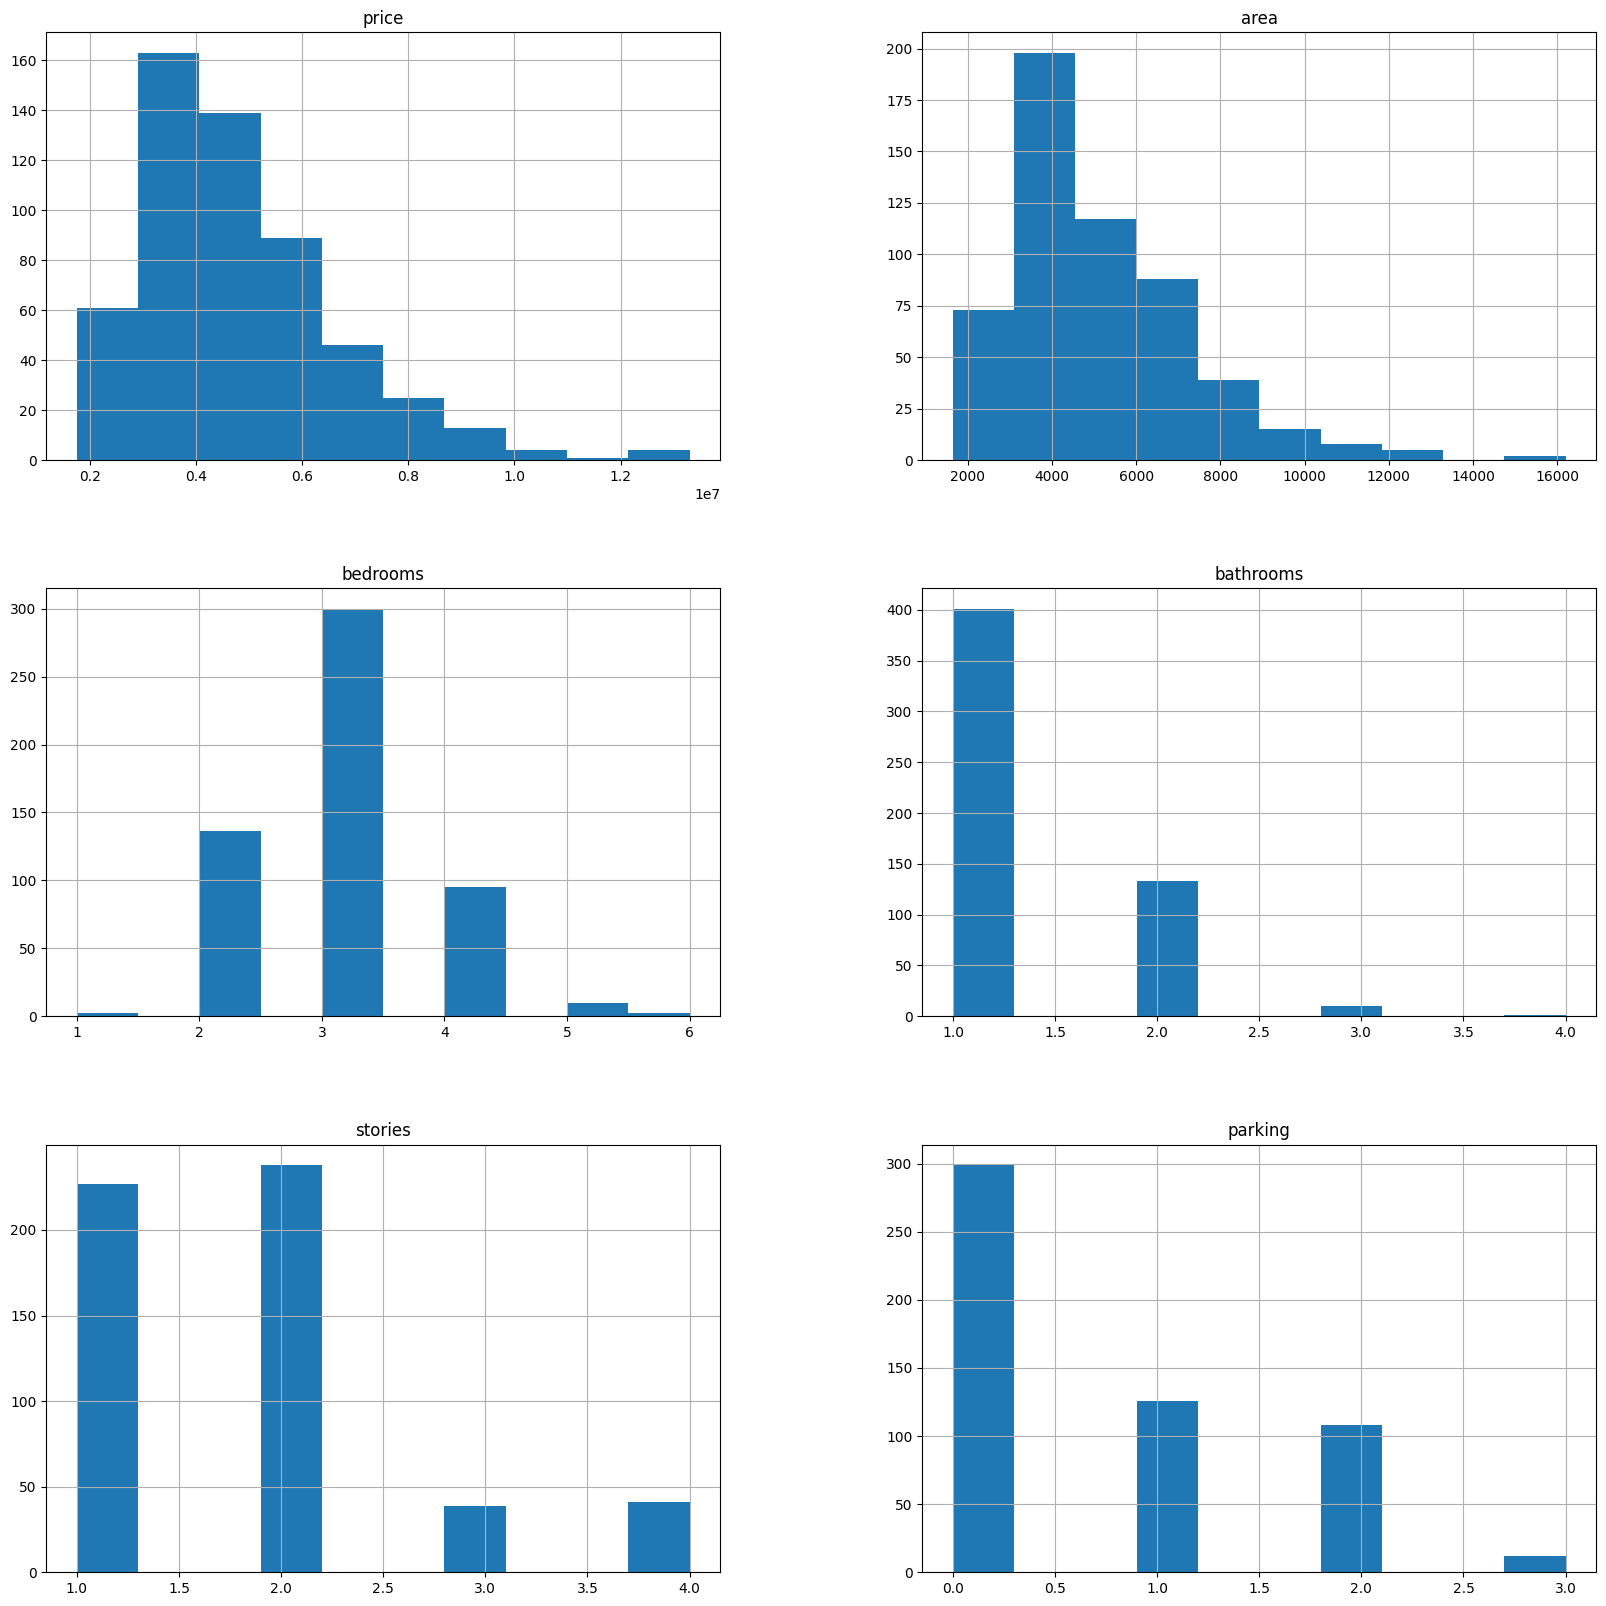

In [33]:
dft.hist(figsize=(20,20))

In [34]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [35]:
dft.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
dft['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [37]:
dft = dft.join(pd.get_dummies(df[['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning', 'furnishingstatus', 'prefarea']]))

In [38]:
dft=dft.drop(columns=['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning', 'furnishingstatus', 'prefarea'])

In [39]:
dft.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,True,False,False,False,True
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,False,True,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,True,False,False,False,True
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,False,True,False


In [40]:
dft.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_no,prefarea_yes
price,1.00,0.54,0.37,0.52,0.42,0.38,-0.30,0.30,-0.26,0.26,...,0.19,-0.09,0.09,-0.45,0.45,0.23,0.06,-0.28,-0.33,0.33
area,0.54,1.00,0.15,0.19,0.08,0.35,-0.29,0.29,-0.14,0.14,...,0.05,0.01,-0.01,-0.22,0.22,0.15,0.01,-0.14,-0.23,0.23
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14,0.01,-0.01,-0.08,0.08,...,0.10,-0.05,0.05,-0.16,0.16,0.08,0.05,-0.13,-0.08,0.08
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18,-0.04,0.04,-0.13,0.13,...,0.10,-0.07,0.07,-0.19,0.19,0.11,0.03,-0.13,-0.06,0.06
stories,0.42,0.08,0.41,0.33,1.00,0.05,-0.12,0.12,-0.04,0.04,...,-0.17,-0.02,0.02,-0.29,0.29,0.09,-0.00,-0.08,-0.04,0.04
parking,0.38,0.35,0.14,0.18,0.05,1.00,-0.20,0.20,-0.04,0.04,...,0.05,-0.07,0.07,-0.16,0.16,0.13,0.04,-0.17,-0.09,0.09
mainroad_no,-0.30,-0.29,0.01,-0.04,-0.12,-0.20,1.00,-1.00,0.09,-0.09,...,-0.04,-0.01,0.01,0.11,-0.11,-0.13,-0.01,0.13,0.20,-0.20
mainroad_yes,0.30,0.29,-0.01,0.04,0.12,0.20,-1.00,1.00,-0.09,0.09,...,0.04,0.01,-0.01,-0.11,0.11,0.13,0.01,-0.13,-0.20,0.20
guestroom_no,-0.26,-0.14,-0.08,-0.13,-0.04,-0.04,0.09,-0.09,1.00,-1.00,...,-0.37,-0.01,0.01,0.14,-0.14,-0.10,-0.01,0.10,0.16,-0.16
guestroom_yes,0.26,0.14,0.08,0.13,0.04,0.04,-0.09,0.09,-1.00,1.00,...,0.37,0.01,-0.01,-0.14,0.14,0.10,0.01,-0.10,-0.16,0.16


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

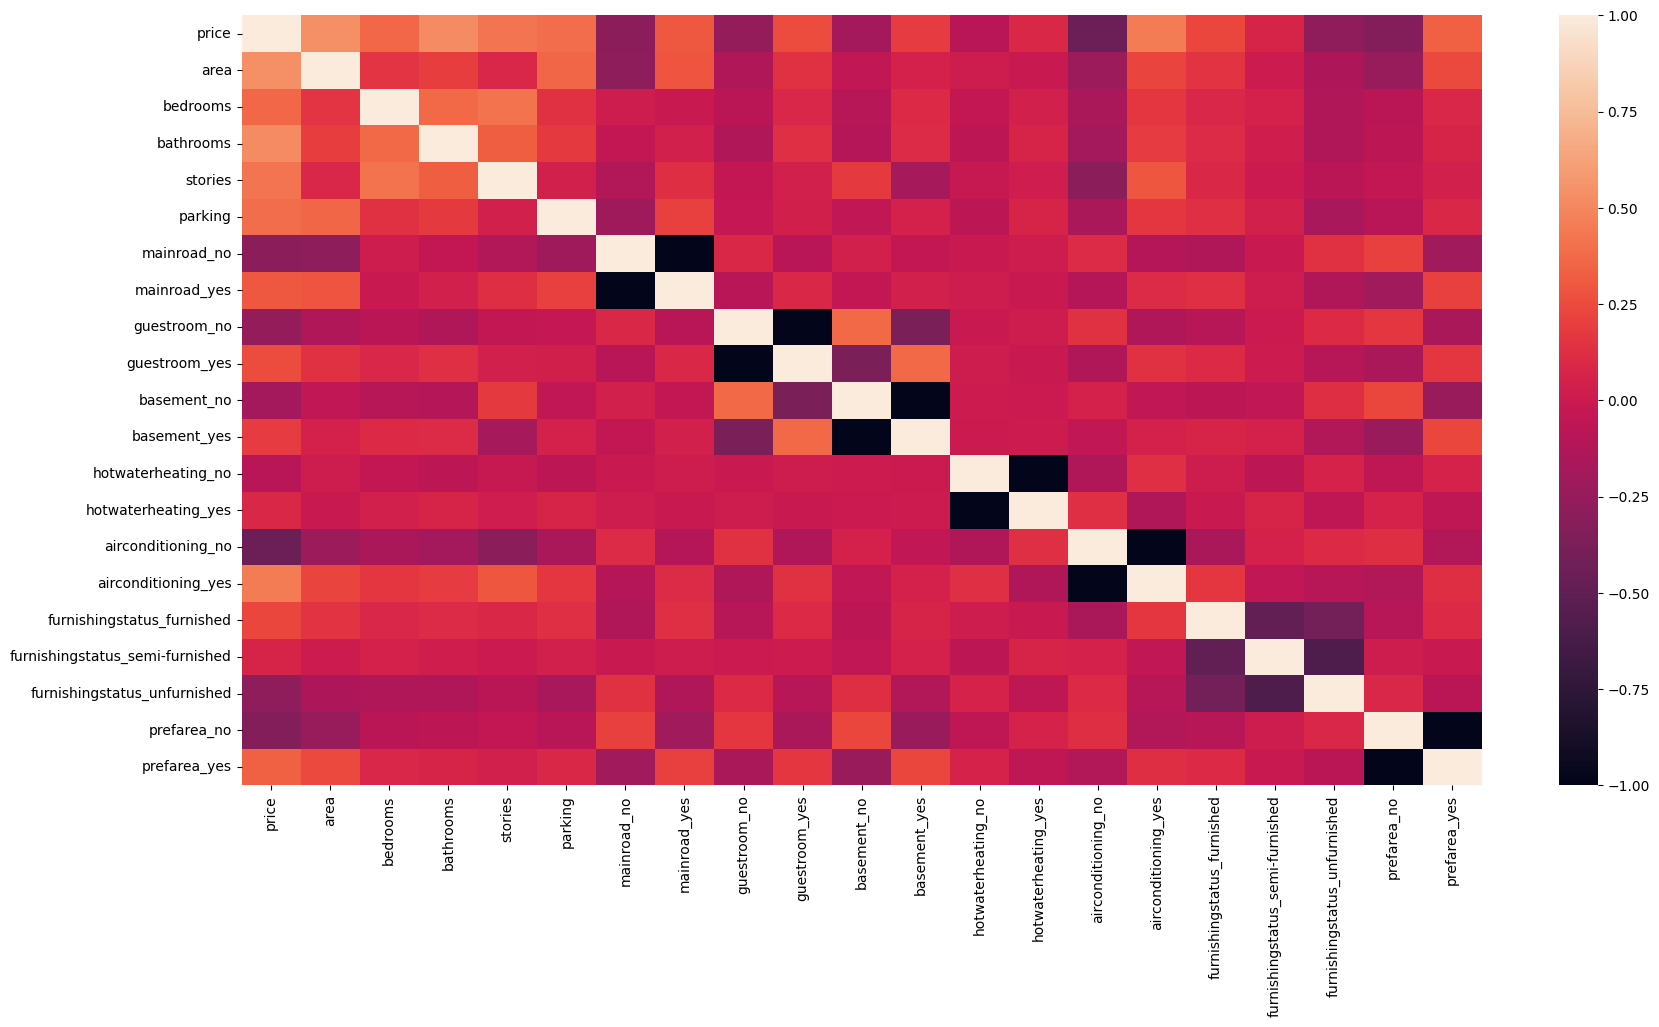

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(dft.corr())

In [43]:
X = dft.drop(columns=['price'])
y = dft['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)
print('R2: ', r2_score(y_test, y_pred))
print('RMSE: ' , np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean: ', np.mean(dft['price']))

R2:  0.6529242642153188
RMSE:  1324506.960091438
Mean:  4766729.247706422
